In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

sns.set_style('darkgrid')

font = {'size': 18}
matplotlib.rc('font', **font)

Load the training data

In [2]:
df = pd.read_pickle("data/train.pkl")

Create a column that the title length

In [76]:
df['title_length'] = [len(df.title.iloc[i]) for i in range(len(df.title))]

There are some missing values in the self text data so replace them with an empty string

In [77]:
df.selftext = df.selftext.fillna("")

In [78]:
df['selftext_lenght'] = [len(df.selftext.iloc[i]) for i in range(len(df.selftext))]

In [79]:
df.head()

,id,author,title,selftext,time,date,score,num_comments,title_length,selftext_lenght
54442,n97ehm,weremanthing,Refinance my home to free up VA loan or wait?,First let me say thank you for looking at my p...,11:20:52,2021-05-10,1,2,45,1119
41531,nzf89i,b1ackcat,Thank you for being such a great resource; you...,[removed],01:08:32,2021-06-14,1,2,82,9
61126,mxntnt,runnerup,"401k vs 457b, not sure which to max first",My work has both the 401k and 457b plans. They...,12:50:32,2021-04-24,3,7,41,576
87222,lg8t6y,Bunburier,"Student Loans, Interest Rate, and Payment Stra...",I'll be attending graduate school soon. Tuitio...,12:44:56,2021-02-09,2,2,59,381
34549,obzx08,Mxnchkinz_,What do I put under Gross Income when applying...,I'm applying for a Discover Secured Credit Car...,21:27:28,2021-07-01,0,15,64,335


Some sentiment analysis using nltk library

In [80]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results_neg = []
results_neu = []
results_pos = []
results_comp = []

for line in df.title:
    pol_score = sia.polarity_scores(line)
    pol_score['title'] = line

    results_neg.append(pol_score['neg'])
    results_neu.append(pol_score['neu'])
    results_pos.append(pol_score['pos'])
    results_comp.append(pol_score['compound'])

In [81]:
df['senti_neg'] = results_neg
df['senti_neu'] = results_neu
df['senti_pos'] = results_pos
df['senti_compnd'] = results_comp

In [82]:
df.head()

,id,author,title,selftext,time,date,score,num_comments,title_length,selftext_lenght,senti_neg,senti_neu,senti_pos,senti_compnd
54442,n97ehm,weremanthing,Refinance my home to free up VA loan or wait?,First let me say thank you for looking at my p...,11:20:52,2021-05-10,1,2,45,1119,0.000,0.732,0.268,0.5106
41531,nzf89i,b1ackcat,Thank you for being such a great resource; you...,[removed],01:08:32,2021-06-14,1,2,82,9,0.111,0.356,0.534,0.8934
61126,mxntnt,runnerup,"401k vs 457b, not sure which to max first",My work has both the 401k and 457b plans. They...,12:50:32,2021-04-24,3,7,41,576,0.197,0.803,0.000,-0.2411
87222,lg8t6y,Bunburier,"Student Loans, Interest Rate, and Payment Stra...",I'll be attending graduate school soon. Tuitio...,12:44:56,2021-02-09,2,2,59,381,0.000,0.700,0.300,0.4588
34549,obzx08,Mxnchkinz_,What do I put under Gross Income when applying...,I'm applying for a Discover Secured Credit Car...,21:27:28,2021-07-01,0,15,64,335,0.211,0.612,0.177,-0.1280


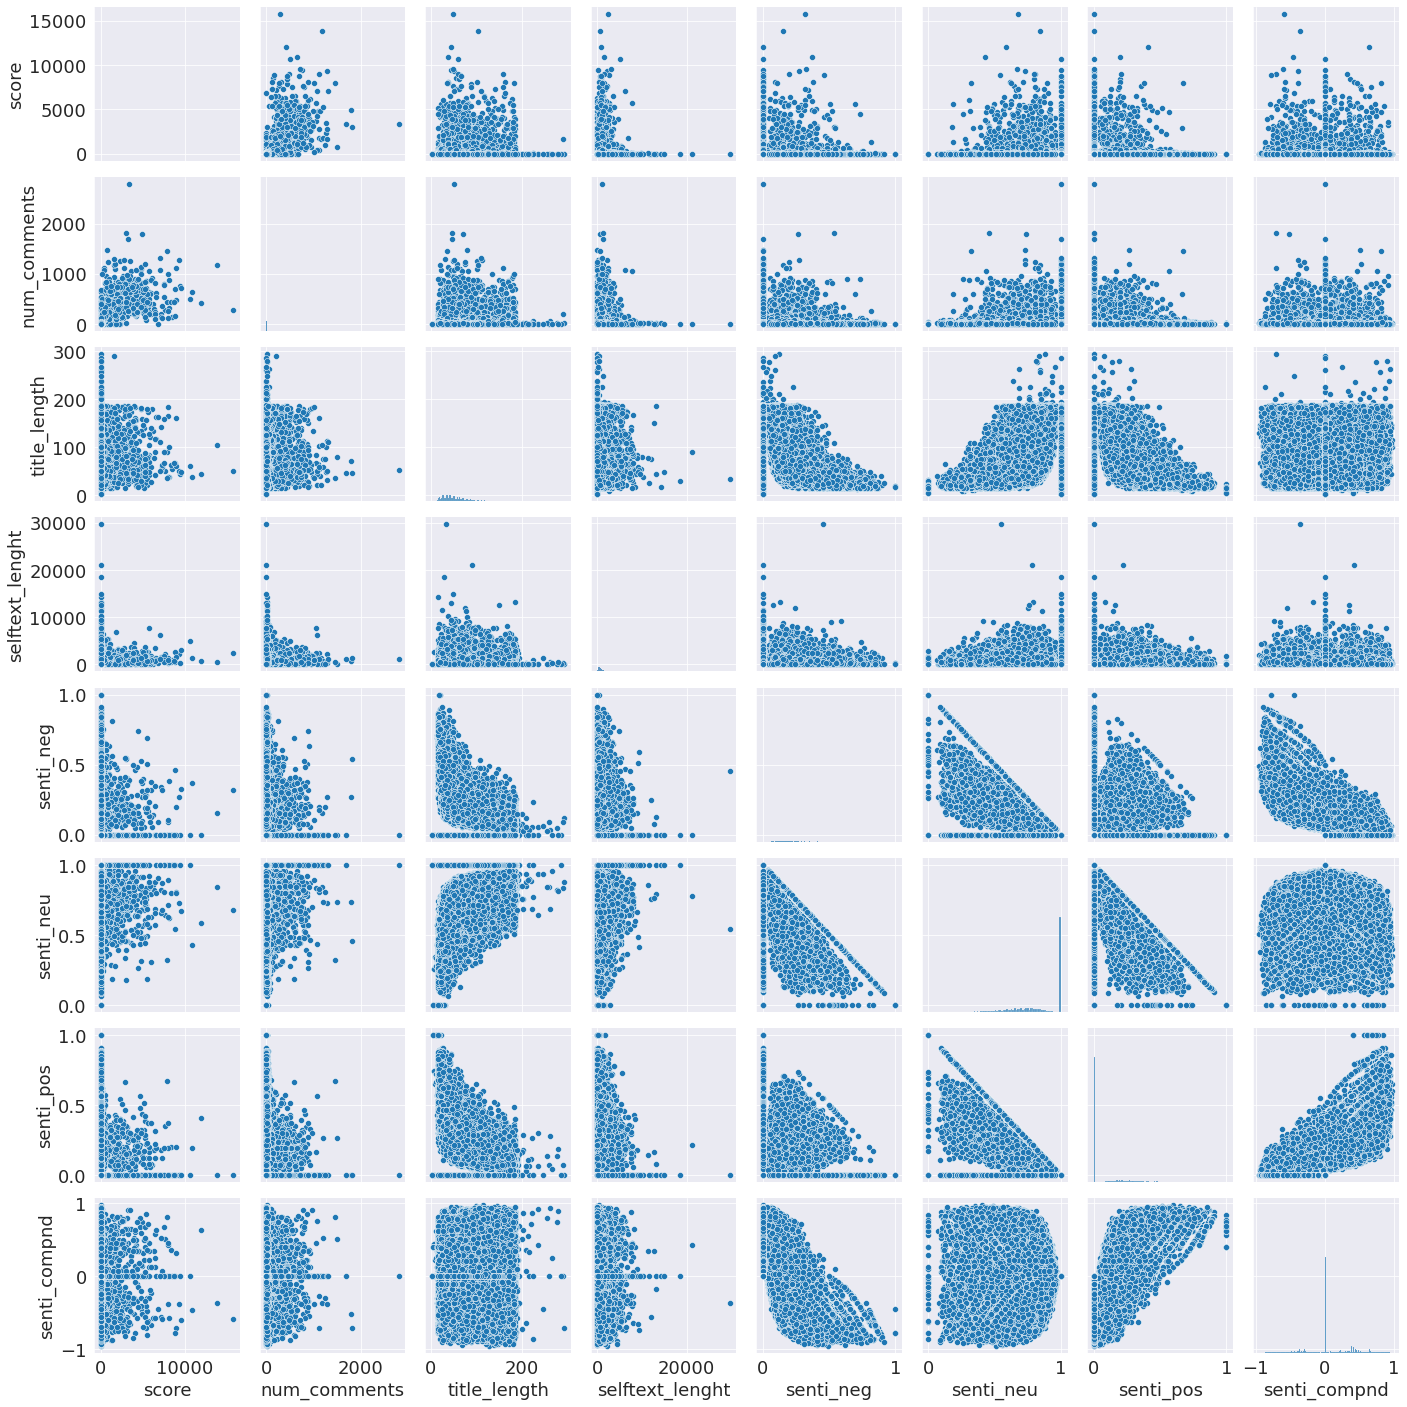

In [83]:
sns.pairplot(df)

In [84]:
user_data1 = pd.read_pickle("data/user_data_0_30000.pkl")
user_data2 = pd.read_pickle("data/personal_finance_user_data_30000_60000.pkl")
user_data3 = pd.read_pickle("data/personal_finance_user_data_60000_end.pkl")

In [85]:
frames = [user_data1, user_data2, user_data3]

In [86]:
userdata = pd.concat(frames)

In [87]:
userdata

,Author,Created,nComments,medianCommentScore,maxCommentScore,nSubmissions,medianSubmissionScore,maxSubmissionScore
0,weremanthing,1.47283e+09,94,1,1871,39,3,25906
1,b1ackcat,1.27553e+09,0,NA,NA,92,6,4888
2,runnerup,1.2556e+09,0,NA,NA,0,NA,NA
3,Bunburier,1.50055e+09,0,NA,NA,74,2,490
4,Mxnchkinz_,1.59849e+09,29,1,3,44,1.5,42
...,...,...,...,...,...,...,...,...
64936,cj832,1.41474e+09,0,NA,NA,90,19,2234
64937,Danno510,1.53984e+09,0,NA,NA,1,3,3
64938,Chambec,1.35079e+09,62,2,182,96,3,1689
64939,AllUNsaregone,1.49731e+09,11,1,5,58,3,120


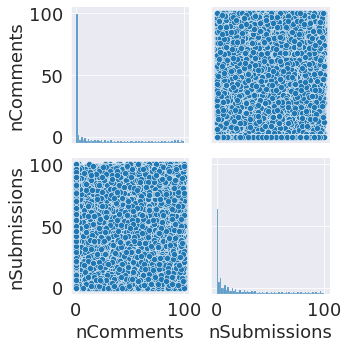

In [88]:
sns.pairplot(userdata)

Modeling 

In [111]:
## import xgboost
import xgboost

In [112]:
xgb_reg = xgboost.XGBRegressor(max_depth=1,
                                   n_estimators=5000,
                                   learning_rate=.1)

Defining the mertric

In [113]:
y_train = df.score/df.score.mean() + df.num_comments/df.num_comments.mean()

In [114]:
y_train

54442     0.199978
41531     0.199978
61126     0.674514
87222     0.250797
34549     1.118697
            ...   
79858     0.996595
85642     0.125398
78743     0.647457
123775    0.796617
31500     0.199978
Length: 124941, dtype: float64

In [123]:
X_train = df[['title_length', 'selftext_lenght', 'senti_compnd']]

In [124]:
df.keys()

Index(['id', 'author', 'title', 'selftext', 'time', 'date', 'score',
       'num_comments', 'title_length', 'selftext_lenght', 'senti_neg',
       'senti_neu', 'senti_pos', 'senti_compnd'],
      dtype='object')

In [125]:
X_train

,title_length,selftext_lenght,senti_compnd
54442,45,1119,0.5106
41531,82,9,0.8934
61126,41,576,-0.2411
87222,59,381,0.4588
34549,64,335,-0.1280
...,...,...,...
79858,21,609,0.0000
85642,51,9,0.4019
78743,79,1209,0.3818
123775,72,9,0.0000


In [126]:
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=1,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=5000, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

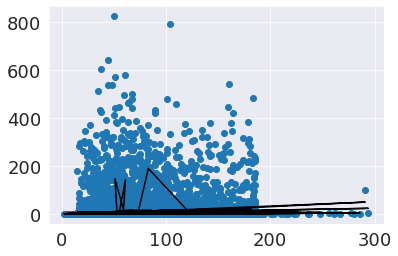

In [127]:
plt.scatter(X_train.title_length, y_train)
plt.plot(X_train.title_length, xgb_reg.predict(X_train), 'k')

In [128]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [129]:
mean_squared_error(xgb_reg.predict(X_train), y_train)

227.01943745815367